In [ ]:
import tensorflow as tf
import zipfile
import os
import datetime
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models
import tensorflow.experimental.numpy as tnp
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import pandas as pd
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Tensorboard Callbacks

In [ ]:
#Load TensorBoard notebook extension
%load_ext tensorboard

In [ ]:
import datetime

#Create a Function to build a TensorBoard CallBack
def create_tensorboard_callback():
  #Create a Log Directory to store Logs
  logdir = os.path.join("/content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/Log",
                        #Track The Logs whenever we run expirement i.e. joining it with datetime
                        datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))
  
  return tf.keras.callbacks.TensorBoard(logdir)

In [ ]:
#Walkthrough
for dirpath, dirnames, filenames in os.walk("/content/drive/MyDrive/IBM WASTE  DATASET"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in {dirpath}.")

There are 1 directories and 0 images in /content/drive/MyDrive/IBM WASTE  DATASET.
There are 1 directories and 0 images in /content/drive/MyDrive/IBM WASTE  DATASET/archive.
There are 1 directories and 0 images in /content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET.
There are 4 directories and 0 images in /content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET.
There are 2 directories and 0 images in /content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/TRAIN.
There are 0 directories and 500 images in /content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/TRAIN/R.
There are 0 directories and 500 images in /content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/TRAIN/O.
There are 2 directories and 0 images in /content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/TEST.
There are 0 directories and 100 images in /content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/TEST/R.
There are 0 directories and 100 images in /co

## ***Setting up ***

In [ ]:
def veiw_random_image(target_dir,target_class):
  #Set up target directory(We'll veiw images from here)
  target_folder = target_dir +'/'+ target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder),1)
  print(random_image)
  print(random_image[0])
  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" +random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image Shape: {img.shape}") #Show the shape of image

  return img

['O_9499.jpg']
O_9499.jpg
Image Shape: (195, 258, 3)


array([[[190, 192, 187],
        [128, 130, 125],
        [154, 155, 150],
        ...,
        [146, 145, 140],
        [124, 123, 121],
        [196, 195, 193]],

       [[140, 142, 137],
        [ 22,  23,  18],
        [  9,  10,   5],
        ...,
        [  5,   2,   0],
        [ 16,  15,  13],
        [134, 133, 131]],

       [[149, 150, 145],
        [  8,   9,   4],
        [  4,   3,   0],
        ...,
        [ 27,  20,  14],
        [  1,   0,   0],
        [141, 140, 138]],

       ...,

       [[191, 141, 144],
        [ 67,   8,  12],
        [ 71,   1,   3],
        ...,
        [103,  18,   0],
        [ 67,   0,   9],
        [186, 137, 140]],

       [[150, 120, 120],
        [ 57,  18,  19],
        [ 67,  19,  17],
        ...,
        [105,   0,   4],
        [ 87,  30,  36],
        [172, 134, 133]],

       [[190, 182, 180],
        [140, 126, 123],
        [165, 141, 137],
        ...,
        [161, 142, 136],
        [165, 125, 126],
        [210, 186, 182]]

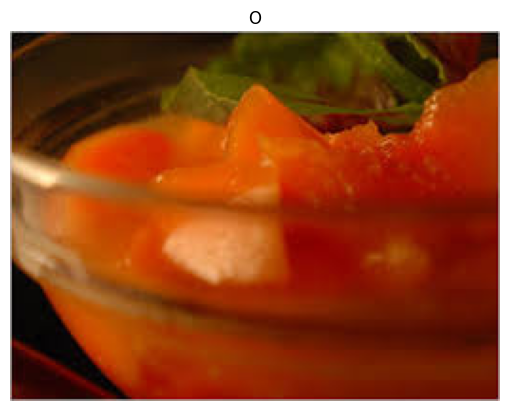

In [ ]:
veiw_random_image('/content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/TRAIN','O')

# ***Data Augmentation***

In [ ]:
BATCH_SIZE=32
IMG_SIZE = (256,256)
# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255,
                                    rotation_range=5,
                                    width_shift_range=0.3,
                                    height_shift_range=0.3,
                                    horizontal_flip=True,
                                    vertical_flip=True,
                                    channel_shift_range=0.4)
  
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train directories
train_dir = '/content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/TRAIN'
test_dir = '/content/drive/MyDrive/IBM WASTE  DATASET/archive/DATASET/DATASET/TEST'

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                                batch_size=BATCH_SIZE, # number of images to process at a time 
                                                target_size=IMG_SIZE, # convert all images to be 256 x 256
                                                class_mode="categorical", # type of problem we're working on
                                                seed=42)
  
valid_data = valid_datagen.flow_from_directory(test_dir,
                                                batch_size=BATCH_SIZE, # number of images to process at a time 
                                                target_size=IMG_SIZE, # convert all images to be 256 x 256
                                                class_mode="categorical", # type of problem we're working on
                                                seed=42)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [ ]:
train_data,valid_data

(<keras.preprocessing.image.DirectoryIterator at 0x7fd955d06130>,
 <keras.preprocessing.image.DirectoryIterator at 0x7fd955d061c0>)

In [ ]:
BATCH_SIZE  = 32
IMAGE_SIZE = 256
CHANNELS = 3
input_shape = (IMAGE_SIZE , IMAGE_SIZE , CHANNELS)
n_classes = 2

In [ ]:
model_0 = models.Sequential([
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model_0.build(input_shape=input_shape)

In [ ]:
#Create new Tensorboard Session everytime we train a model
tensorboard = create_tensorboard_callback()

In [ ]:
model_0.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
history_1 = model_0.fit(train_data,
                        epochs=100,
                        batch_size=BATCH_SIZE,
                        verbose=1,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data),
                        callbacks=[tensorboard])

Epoch 1/100
32/32 [==============================] - 239s 7s/step - loss: 0.6417 - accuracy: 0.6330 - val_loss: 0.6697 - val_accuracy: 0.7050
Epoch 2/100
32/32 [==============================] - 19s 579ms/step - loss: 0.5194 - accuracy: 0.7690 - val_loss: 0.7221 - val_accuracy: 0.6650
Epoch 3/100
32/32 [==============================] - 20s 622ms/step - loss: 0.4685 - accuracy: 0.7940 - val_loss: 0.4309 - val_accuracy: 0.7950
Epoch 4/100
32/32 [==============================] - 19s 583ms/step - loss: 0.4089 - accuracy: 0.8030 - val_loss: 0.4351 - val_accuracy: 0.8050
Epoch 5/100
32/32 [==============================] - 19s 599ms/step - loss: 0.4242 - accuracy: 0.8060 - val_loss: 0.5007 - val_accuracy: 0.7950
Epoch 6/100
32/32 [==============================] - 19s 579ms/step - loss: 0.4071 - accuracy: 0.8050 - val_loss: 0.4459 - val_accuracy: 0.8000
Epoch 7/100
32/32 [==============================] - 20s 614ms/step - loss: 0.3965 - accuracy: 0.8200 - val_loss: 0.4642 - val_accuracy: 0

In [ ]:
model_0.save('Waste_Segregation.h5')